In [1]:
import torch
import numpy


In [4]:
gene_representations = torch.load("notebooks/gene_embeddings/all_tokens.torch")


/tmp/ipykernel_4025700/2732240092.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gene_representations = torch.load("notebooks/gene_embeddings/all_tokens.torch")


In [5]:
generep_names


tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-1.1892,  1.3932,  2.1059,  ...,  1.4319,  1.6443, -0.6632],
        [-1.6191, -0.3972, -0.4643,  ..., -0.3136, -2.2376,  0.2842],
        ...,
        [-0.6270, -2.2880, -0.2370,  ...,  0.0053, -0.0179, -0.8923],
        [ 0.7524, -1.0703, -0.3290,  ...,  0.3269, -0.3019, -0.9970],
        [ 1.3600, -0.9809, -1.6618,  ...,  0.7187, -0.7521, -1.9612]])

In [6]:
generep_names

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-1.1892,  1.3932,  2.1059,  ...,  1.4319,  1.6443, -0.6632],
        [-1.6191, -0.3972, -0.4643,  ..., -0.3136, -2.2376,  0.2842],
        ...,
        [-0.6270, -2.2880, -0.2370,  ...,  0.0053, -0.0179, -0.8923],
        [ 0.7524, -1.0703, -0.3290,  ...,  0.3269, -0.3019, -0.9970],
        [ 1.3600, -0.9809, -1.6618,  ...,  0.7187, -0.7521, -1.9612]])

Running PCA...
PCA DONE
Variance explained by 100 PCs: 0.189
Running UMAP...


/orcd/data/omarabu/001/opitcho/miniforge3/envs/huggingface/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/orcd/data/omarabu/001/opitcho/miniforge3/envs/huggingface/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP DONE


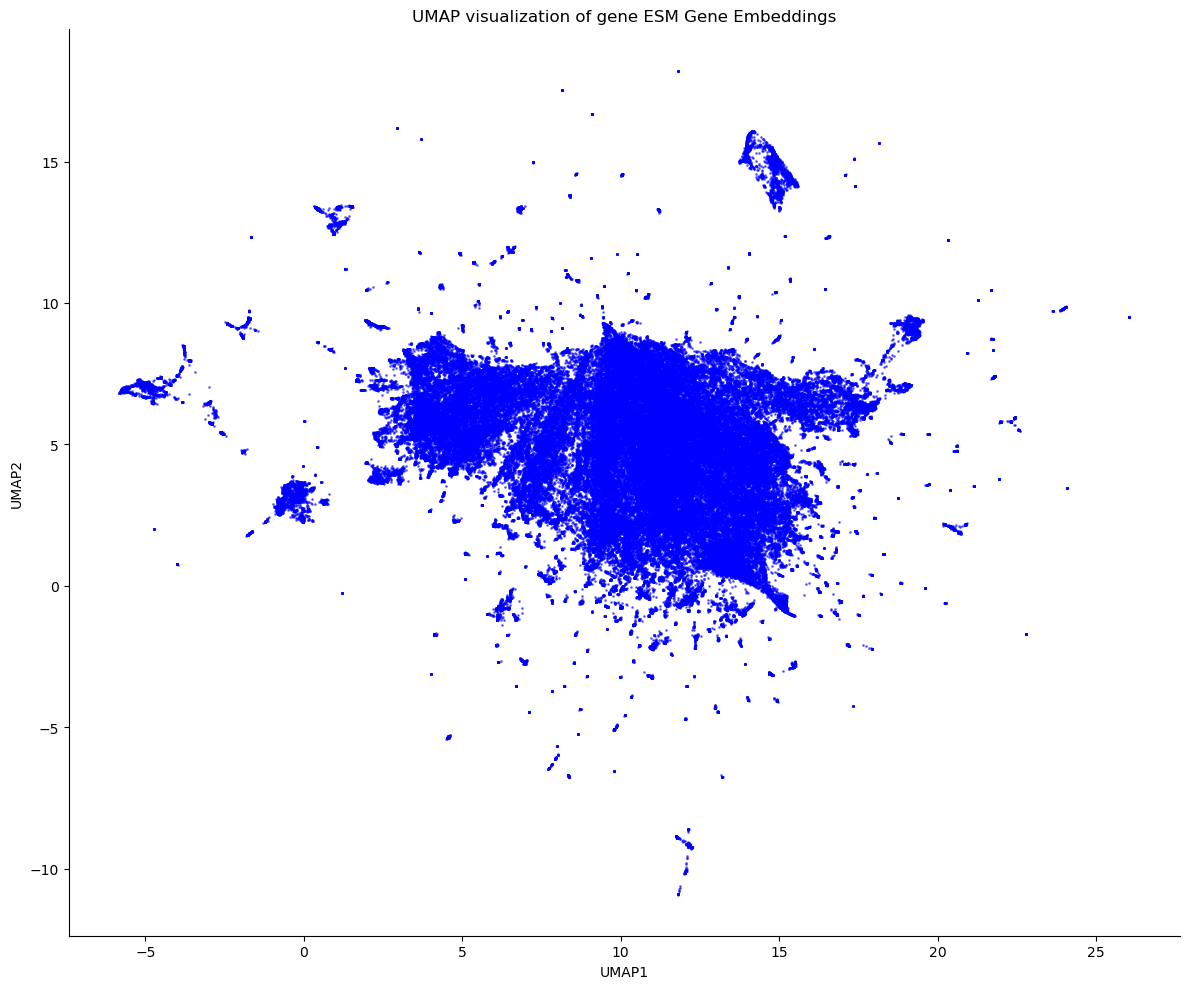

In [8]:
import torch
import umap
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to numpy and standardize
data = gene_representations.cpu().numpy()
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# PCA first - reduce to 100 dimensions
print("Running PCA...")
pca = PCA(n_components=100)
data_pca = pca.fit_transform(data_scaled)

print("PCA DONE")
# Calculate variance explained
var_explained = pca.explained_variance_ratio_.cumsum()
print(f"Variance explained by 100 PCs: {var_explained[-1]:.3f}")

# UMAP on PCA results
print("Running UMAP...")
reducer = umap.UMAP(
    n_neighbors=30,
    min_dist=0.1,
    random_state=42,
    low_memory=True
)
embedding = reducer.fit_transform(data_pca)
print("UMAP DONE")
# Plot
plt.figure(figsize=(12, 10))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s=1,
    alpha=0.5,
    c='blue'
)

plt.title('UMAP visualization of gene ESM Gene Embeddings')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
sns.despine()
plt.tight_layout()
plt.show()